In [5]:
#Merging of two datasets

import pandas as pd

file1 = "C:/Users/karth/PERSONAL/Data_Analytics/SEMESTER-2/DAPA/churn1.csv"
file2 = "C:/Users/karth/PERSONAL/Data_Analytics/SEMESTER-2/DAPA/churn2.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

merged_df = pd.concat([df1, df2], axis=0)

# Save the merged DataFrame to a new CSV file
output_file = 'churndataset.csv'
merged_df.to_csv(output_file, index=False)

print("CSV files merged and saved successfully.")

CSV files merged and saved successfully.


Checking for null values

In [6]:
import pandas as pd

# Replace this with the actual file path of your CSV file
file = 'churndataset.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file)

# Check for missing values in the entire DataFrame
missing_values = df.isna().sum()

# Display the count of missing values for each column
print(missing_values)


State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


Label Encoding

In [7]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


# Encoding 

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lst=['State','International plan','Voice mail plan','Churn']
for i in lst:
    df[i]=le.fit_transform(df[i])

In [9]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,18,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,15,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,34,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,40,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,11,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


Visualisation

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

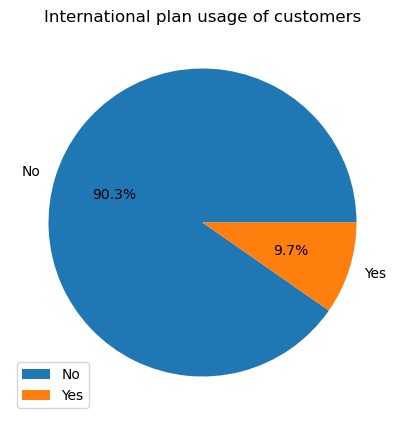

In [11]:
y=df['International plan'].value_counts()
plt.figure(figsize=(5,5))
labels=['No','Yes']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('International plan usage of customers')
plt.show()

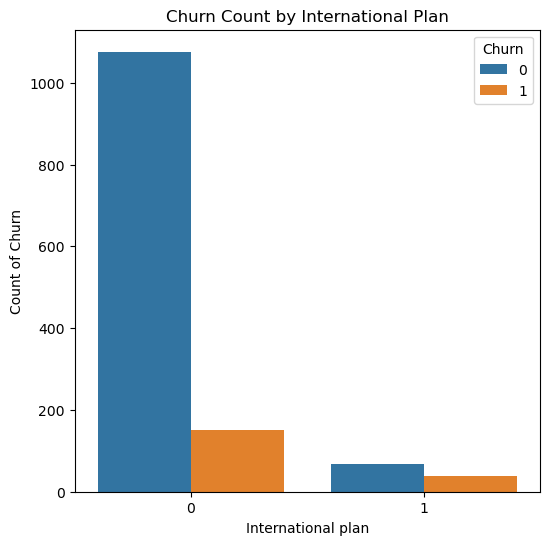

In [18]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
sns.countplot(x='International plan',data=df,hue='Churn')
plt.xlabel('International plan')
plt.ylabel('Count of Churn')
plt.title('Churn Count by International Plan')
plt.show()

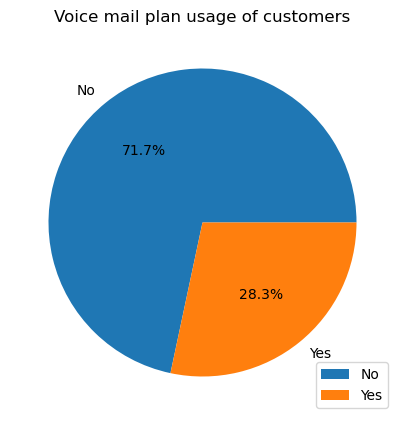

In [19]:
#Voice mail plan
y=df['Voice mail plan'].value_counts()
plt.figure(figsize=(5,5))
labels=['No','Yes']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower right')
plt.title('Voice mail plan usage of customers')
plt.show()

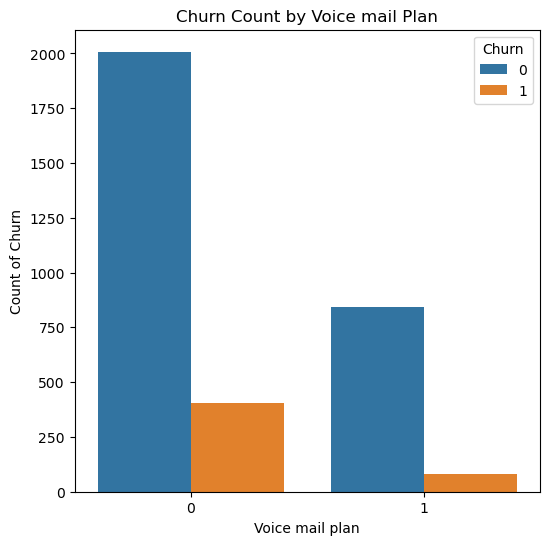

In [12]:
fig,ax=plt.subplots(1,1,figsize=(6,6))
sns.countplot(x='Voice mail plan',data=df,hue='Churn')
plt.xlabel('Voice mail plan')
plt.ylabel('Count of Churn')
plt.title('Churn Count by Voice mail Plan')
plt.show()

<AxesSubplot:>

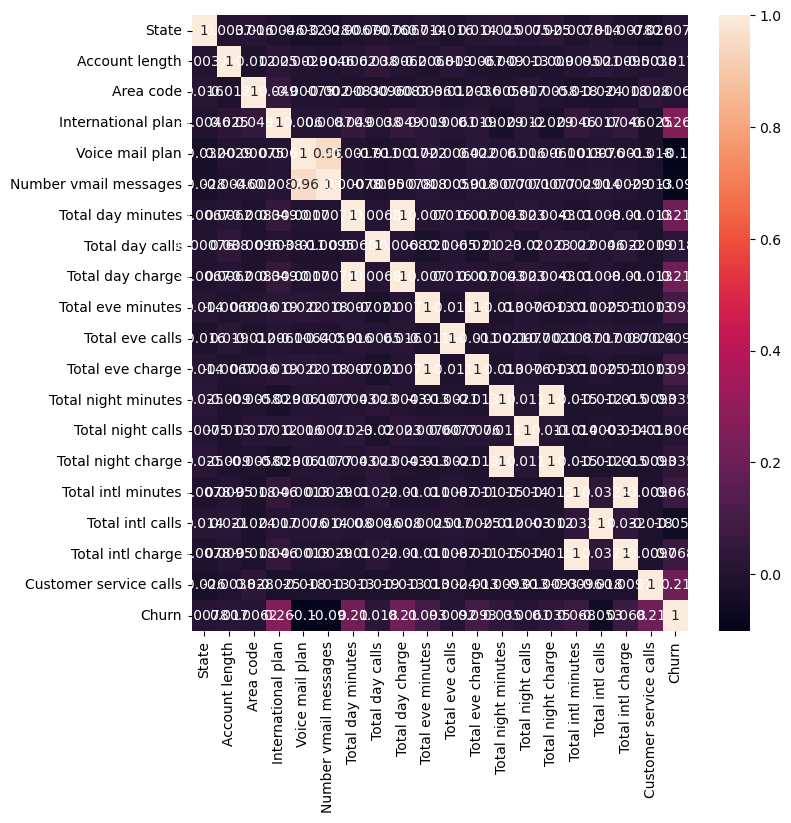

In [13]:
#Heatmap
fig,ax=plt.subplots(1,1,figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

# Model Selection

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

Splitting dataset into Training and Testing sets

In [15]:
X=df.iloc[:,:-1]
print("X \n", X)

Y = df.iloc[:,-1]
print("Y \n", Y)

X 
       State  Account length  Area code  International plan  Voice mail plan  \
0        18             117        408                   0                0   
1        15              65        415                   0                0   
2        34             161        415                   0                0   
3        40             111        415                   0                0   
4        11              49        510                   0                0   
...     ...             ...        ...                 ...              ...   
3328     40              79        415                   0                0   
3329      3             192        415                   0                1   
3330     49              68        415                   0                0   
3331     39              28        510                   0                0   
3332     42              74        415                   0                1   

      Number vmail messages  Total day minutes 

In [16]:
Y

0       0
1       1
2       1
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64

Scaling the data

In [17]:
from sklearn.preprocessing import MinMaxScaler

ms=MinMaxScaler()
X_sc=ms.fit_transform(X)
X_sc

array([[0.36      , 0.47933884, 0.        , ..., 0.2       , 0.43518519,
        0.11111111],
       [0.3       , 0.26446281, 0.06862745, ..., 0.3       , 0.63518519,
        0.44444444],
       [0.68      , 0.66115702, 0.06862745, ..., 0.45      , 0.27037037,
        0.44444444],
       ...,
       [0.98      , 0.2768595 , 0.06862745, ..., 0.2       , 0.47962963,
        0.33333333],
       [0.78      , 0.11157025, 1.        , ..., 0.3       , 0.70555556,
        0.22222222],
       [0.84      , 0.30165289, 0.06862745, ..., 0.2       , 0.68518519,
        0.        ]])

# Model Building

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_sc,Y,random_state=1,test_size=0.3)

In [20]:
X_train.shape

(2333, 19)

In [21]:
y_train.shape

(2333,)

# Model Training

In [24]:
#gradient boost
from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

Classification Report Generation before Hyper Tuning

In [25]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       854
           1       0.91      0.74      0.82       146

    accuracy                           0.95      1000
   macro avg       0.93      0.86      0.89      1000
weighted avg       0.95      0.95      0.95      1000



HyperTuninng for better results

In [26]:
#hypertuning

from sklearn.model_selection import GridSearchCV


parameters = {'n_estimators': [50, 100, 200],'learning_rate': [0.1, 0.5, 1.0],'max_depth': [3, 5, 7]}
clf=GridSearchCV(gb,parameters,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [27]:
# finding the best parameters

print(clf.best_params_)


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


Model fitting after HyperTuning

In [30]:
gb1=GradientBoostingClassifier(learning_rate=0.1,max_depth=5,n_estimators=100)
gb1.fit(X_train,y_train)
y_pred_tuned=gb1.predict(X_test)
print(classification_report(y_test,y_pred_tuned))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       854
           1       0.91      0.74      0.82       146

    accuracy                           0.95      1000
   macro avg       0.93      0.86      0.89      1000
weighted avg       0.95      0.95      0.95      1000

